<a href="https://colab.research.google.com/github/ritamsarkar2000/ML/blob/master/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

import numpy as np 

import matplotlib.pyplot as plt


In [2]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path = tf.keras.utils.get_file('cats_and_dogs.zip', origin=url, extract=True)

68608000/68606236 [==============================] - 2s 0us/step


In [3]:
PATH = os.path.join(os.path.dirname(path), 'cats_and_dogs_filtered')
train_dir= os.path.join(PATH, 'train')
val_dir= os.path.join(PATH,'validation')

train_cats_dir= os.path.join(train_dir, 'cats')             #training directory for cats
train_dogs_dir= os.path.join(train_dir, 'dogs')             #training directory for dogs

val_cats_dir= os.path.join(val_dir, 'cats')                 #validation dir for cats
val_dogs_dir= os.path.join(val_dir, 'dogs')                 #validation dir for dogs
num_cats_train= len(os.listdir(train_cats_dir))            # number of cat images in training set
num_dogs_train= len(os.listdir(train_dogs_dir))            # number of dog images in training set

num_cats_val= len(os.listdir(val_cats_dir))                # number of cat images in val set
num_dogs_val= len(os.listdir(val_dogs_dir))

print('the number of cats in training set:', num_cats_train)
print('the number of dogs in training set:', num_dogs_train)
print('the number of cats in val set:', num_cats_val)
print('the number of dogs in val set:', num_dogs_val)

total_cats= num_cats_train + num_cats_val
total_dogs= num_dogs_train + num_dogs_val

print('total number of cat images:', total_cats)
print('total number of dog images:', total_dogs)

the number of cats in training set: 1000
the number of dogs in training set: 1000
the number of cats in val set: 500
the number of dogs in val set: 500
total number of cat images: 1500
total number of dog images: 1500


In [4]:
batch_size= 128
epochs= 35
image_shape=120

In [5]:
image_gen_train= ImageDataGenerator(rescale= 1./255,
                                    horizontal_flip= True,
                                    rotation_range= 45,
                                    width_shift_range=.5,
                                    height_shift_range= .5,
                                    zoom_range=.5)

train_data_gen= image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory= train_dir, 
                                                    shuffle=True,
                                                    target_size=(image_shape,image_shape),
                                                    class_mode= 'binary')

image_gen_val= ImageDataGenerator(rescale=1./255)

val_data_gen= image_gen_val.flow_from_directory(batch_size= batch_size,
                                                directory= val_dir,
                                                target_size= (image_shape,image_shape),
                                                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
model = Sequential([Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(image_shape, image_shape, 3)),
                    MaxPooling2D(),
                    Dropout(0.2),
                    Conv2D(32, (3,3), padding='same', activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.2),
                    Conv2D(64,(3,3), padding='same', activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.2),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=2000 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=1000 // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/35
15/15 [==============================] - 16s 1s/step - loss: 1.1348 - accuracy: 0.4888 - val_loss: 0.6933 - val_accuracy: 0.5011
Epoch 2/35
15/15 [==============================] - 15s 1s/step - loss: 0.6933 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.4967
Epoch 3/35
15/15 [==============================] - 16s 1s/step - loss: 0.6928 - accuracy: 0.4909 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 4/35
15/15 [==============================] - 15s 1s/step - loss: 0.6925 - accuracy: 0.4973 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 5/35
15/15 [==============================] - 15s 1s/step - loss: 0.6879 - accuracy: 0.5107 - val_loss: 0.6745 - val_accuracy: 0.5513
Epoch 6/35
15/15 [==============================] - 15s 996ms/step - loss: 0.6803 - accuracy: 0.5310 - val_loss: 0.6679 - val_accuracy: 0.5469
Epoch 7/35
15/15 [==============================] - 15s 998ms/step - loss: 0.6698

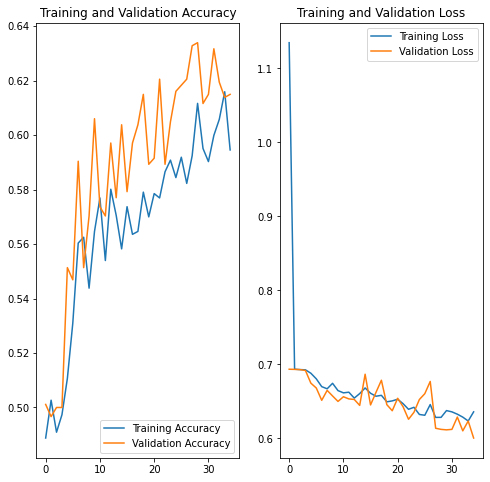

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()